In [1]:
!pip install mean_average_precision

  Using cached mean_average_precision-2024.1.5.0-py3-none-any.whl.metadata (2.8 kB)
Using cached mean_average_precision-2024.1.5.0-py3-none-any.whl (14 kB)


클래스 아이디가 0과 1인것에 대해서만

Mean Average Precision (mAP): 0.6881276616816876
Mean Precision: 0.6881276616816876
Mean Recall: 0.6792952809901962
Mean Accuracy: 0.49469344382262603


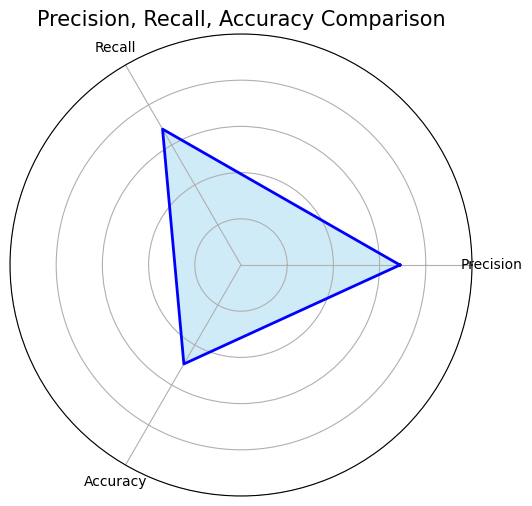

In [ ]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# IoU 계산 함수 정의
def calculate_iou(box_a, box_b):
    xA = max(box_a[0], box_b[0])
    yA = max(box_a[1], box_b[1])
    xB = min(box_a[2], box_b[2])
    yB = min(box_a[3], box_b[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box_a_area = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
    box_b_area = (box_b[2] - box_b[0]) * (box_b[3] - box_b[1])
    iou = inter_area / float(box_a_area + box_b_area - inter_area)
    return iou

# A와 B 파일을 불러와 데이터셋 생성
def load_dataset(folder_path):
    dataset = []
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    for file in files:
        with open(file, "r") as f:
            for line in f:
                # 각 라인에서 클래스와 bounding box 좌표를 읽음
                values = line.strip().split()
                class_id = int(values[0])
                box = list(map(float, values[1:]))
                if class_id == 0 or class_id == 1:
                    dataset.append([class_id] + box)
    return np.array(dataset)
# 클래스별 IoU 계산 및 mAP
class_ids = [0, 1]  # 클래스 0과 1만 포함
iou_threshold = 0.5  # IoU threshold for true positive

# 경로 설정
dataset_a_path = 'evaluationData/converted_labels'  # 실제 레이블 폴더
dataset_b_path = 'data'  # 예측 레이블 폴더

# 데이터셋 A와 B 로드
dataset_a = load_dataset(dataset_a_path)
dataset_b = load_dataset(dataset_b_path)


ap_per_class = []
precision_per_class = []
recall_per_class = []
accuracy_per_class = []

for class_id in class_ids:
    # 각 클래스에 대한 A와 B의 bounding box 추출
    a_boxes = dataset_a[dataset_a[:, 0] == class_id][:, 1:]
    b_boxes = dataset_b[dataset_b[:, 0] == class_id][:, 1:]
    # 해당 클래스의 bounding box가 없을 경우 AP 계산하지 않음
    if len(a_boxes) == 0 or len(b_boxes) == 0:
        continue

    # IoU 계산 및 매칭
    iou_scores = []
    for a_box in a_boxes:
        max_iou = 0
        for b_box in b_boxes:
            iou = calculate_iou(a_box, b_box)
            max_iou = max(max_iou, iou)
        iou_scores.append(max_iou)
    
    # IoU threshold 기준으로 True Positive 정의
    true_positives = sum([iou >= iou_threshold for iou in iou_scores])
    false_positives = len(b_boxes) - true_positives
    false_negatives = len(a_boxes) - true_positives
    total_predictions = true_positives + false_positives + false_negatives

    # Precision, Recall, Accuracy 계산
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    accuracy = true_positives / total_predictions if total_predictions > 0 else 0

    # 클래스별 Precision, Recall, Accuracy 값 저장
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    accuracy_per_class.append(accuracy)

    # AP (Precision) 추가
    ap_per_class.append(precision)

# 모든 클래스에 대한 mAP, Precision, Recall, Accuracy 계산
mean_average_precision = np.mean(ap_per_class) if ap_per_class else 0
mean_precision = np.mean(precision_per_class) if precision_per_class else 0
mean_recall = np.mean(recall_per_class) if recall_per_class else 0
mean_accuracy = np.mean(accuracy_per_class) if accuracy_per_class else 0

# 결과 출력
print("Mean Average Precision (mAP):", mean_average_precision)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)




# 지표 및 값 정의
metrics = ["Precision", "Recall", "Accuracy"]
values = [mean_precision, mean_recall, mean_accuracy]

# 삼각형 좌표계 생성
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values += values[:1]  # 첫 번째 값으로 마무리하여 닫힌 도형 만들기
angles += angles[:1]

# 레이더 차트(삼각형) 생성
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="skyblue", alpha=0.4)
ax.plot(angles, values, color="blue", linewidth=2)

# 지표 라벨과 축 설정
ax.set_yticklabels([])  # 원형 그리드 라벨 비활성화
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)

# 차트 제목 및 디스플레이
plt.title("Precision, Recall, Accuracy Comparison", size=15, position=(0.5, 1.1))
plt.show()



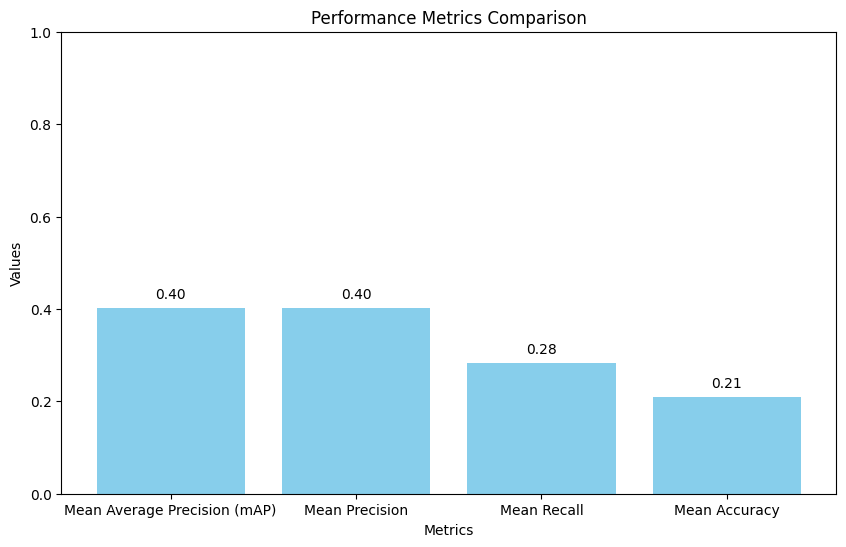

In [20]:
import matplotlib.pyplot as plt

# 각 지표와 값
metrics = ["Mean Average Precision (mAP)", "Mean Precision", "Mean Recall", "Mean Accuracy"]
values = [0.40276249286704163, 0.40276249286704163, 0.28299542209363937, 0.21038555758072336]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color="skyblue")
plt.ylim(0, 1)  # 0에서 1 사이로 y축 제한
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Metrics Comparison")

# 각 바에 값 표시
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center")

plt.show()

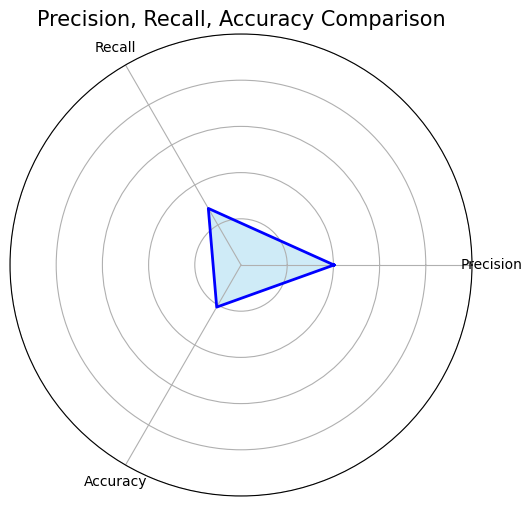

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 지표 및 값 정의
metrics = ["Precision", "Recall", "Accuracy"]
values = [0.40276249286704163, 0.28299542209363937, 0.21038555758072336]

# 삼각형 좌표계 생성
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values += values[:1]  # 첫 번째 값으로 마무리하여 닫힌 도형 만들기
angles += angles[:1]

# 레이더 차트(삼각형) 생성
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="skyblue", alpha=0.4)
ax.plot(angles, values, color="blue", linewidth=2)

# 지표 라벨과 축 설정
ax.set_yticklabels([])  # 원형 그리드 라벨 비활성화
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)

# 차트 제목 및 디스플레이
plt.title("Precision, Recall, Accuracy Comparison", size=15, position=(0.5, 1.1))
plt.show()


In [22]:
import numpy as np
import glob
import os

# IoU 계산 함수 정의
def calculate_iou(box_a, box_b):
    xA = max(box_a[0], box_b[0])
    yA = max(box_a[1], box_b[1])
    xB = min(box_a[2], box_b[2])
    yB = min(box_a[3], box_b[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box_a_area = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
    box_b_area = (box_b[2] - box_b[0]) * (box_b[3] - box_b[1])
    iou = inter_area / float(box_a_area + box_b_area - inter_area)
    return iou

# A와 B 파일을 불러와 데이터셋 생성
def load_dataset(folder_path):
    dataset = []
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    for file in files:
        with open(file, "r") as f:
            for line in f:
                # 각 라인에서 클래스와 bounding box 좌표를 읽음
                values = line.strip().split()
                class_id = int(values[0])
                box = list(map(float, values[1:]))
                if class_id == 0 or class_id == 1:
                    dataset.append([class_id] + box)
    return np.array(dataset)

# 경로 설정
dataset_a_path = 'evalutionData/converted_labels'  # 실제 레이블 폴더
dataset_b_path = 'person'  # 예측 레이블 폴더

# 데이터셋 A와 B 로드
dataset_a = load_dataset(dataset_a_path)
dataset_b = load_dataset(dataset_b_path)

# 클래스별 IoU 계산 및 mAP
class_ids = [0, 1]  # 클래스 0과 1만 포함
iou_threshold = 0.3  # IoU threshold for true positive
ap_per_class = []
precision_per_class = []
recall_per_class = []
accuracy_per_class = []

# 각 클래스별 TP, FP, FN, TN 계산을 위한 변수 초기화
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0

for class_id in class_ids:
    # 각 클래스에 대한 A와 B의 bounding box 추출
    a_boxes = dataset_a[dataset_a[:, 0] == class_id][:, 1:]
    b_boxes = dataset_b[dataset_b[:, 0] == class_id][:, 1:]
    # 해당 클래스의 bounding box가 없을 경우 AP 계산하지 않음
    if len(a_boxes) == 0 or len(b_boxes) == 0:
        continue

    # IoU 계산 및 매칭
    iou_scores = []
    for a_box in a_boxes:
        max_iou = 0
        for b_box in b_boxes:
            iou = calculate_iou(a_box, b_box)
            max_iou = max(max_iou, iou)
        iou_scores.append(max_iou)
    
    # IoU threshold 기준으로 True Positive 정의
    true_positives = sum([iou >= iou_threshold for iou in iou_scores])
    false_positives = len(b_boxes) - true_positives
    false_negatives = len(a_boxes) - true_positives
    # True Negative는 객체 탐지에서 계산하기 어렵기 때문에 주로 생략됨

    # 총 TP, FP, FN 값 누적
    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    # Precision, Recall, Accuracy 계산
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0

    # 클래스별 Precision, Recall, Accuracy 값 저장
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    accuracy_per_class.append(accuracy)

    # AP (Precision) 추가
    ap_per_class.append(precision)

# 모든 클래스에 대한 mAP, Precision, Recall, Accuracy 계산
mean_average_precision = np.mean(ap_per_class) if ap_per_class else 0
mean_precision = np.mean(precision_per_class) if precision_per_class else 0
mean_recall = np.mean(recall_per_class) if recall_per_class else 0
mean_accuracy = np.mean(accuracy_per_class) if accuracy_per_class else 0

# 결과 출력
print("Mean Average Precision (mAP):", mean_average_precision)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Total True Positives (TP):", total_true_positives)
print("Total False Positives (FP):", total_false_positives)
print("Total False Negatives (FN):", total_false_negatives)


Mean Average Precision (mAP): 0.40276249286704163
Mean Precision: 0.40276249286704163
Mean Recall: 0.28299542209363937
Mean Accuracy: 0.21038555758072336
Total True Positives (TP): 276
Total False Positives (FP): 361
Total False Negatives (FN): 752
